# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

In [13]:
df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [14]:
print(df.dtypes)

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [16]:
#seu código aqui
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [17]:
# Excluindo linhas com dados faltantes na coluna 'Genero'
# Justificativa: A coluna Genero tem apenas 0.48% de dados faltantes (muito baixo)
# É preferível excluir essas linhas do que imputar valores categóricos
df = df.dropna(subset=['Genero'])

In [18]:
df.isnull().sum() / len(df) * 100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distribuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

Resumo estatístico — PhoneService
count     1006
unique       2
top        Yes
freq       920
Name: PhoneService, dtype: object


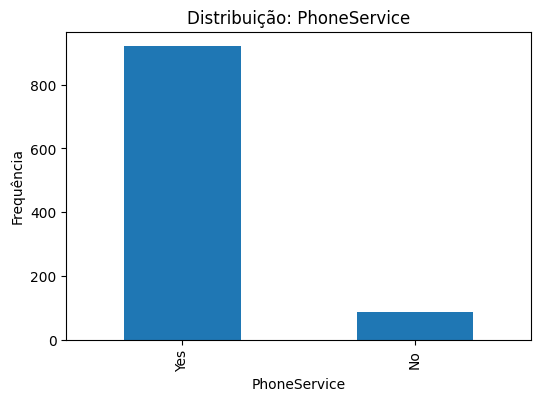

In [19]:
# Tratamento da coluna PhoneService (categórica)
print("Resumo estatístico — PhoneService")
print(df['PhoneService'].describe())

plt.figure(figsize=(6, 4))
df['PhoneService'].value_counts().plot(kind='bar')
plt.title('Distribuição: PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Frequência')
plt.show()

# Substituindo pela moda (valor mais frequente)
# Justificativa: "Yes" representa mais de 96% dos dados válidos
df['PhoneService'] = df['PhoneService'].fillna("Yes")

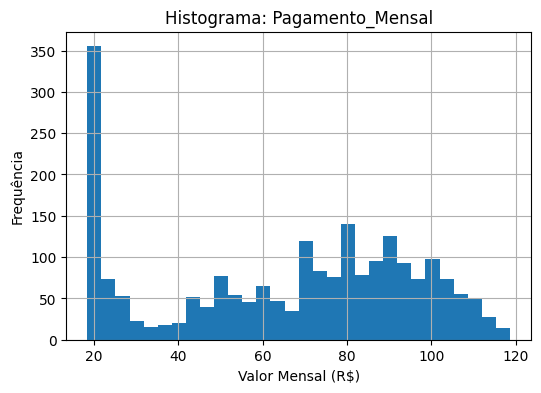

Resumo estatístico — Pagamento_Mensal:
count    2175.000000
mean       65.607563
std        29.931520
min        18.400000
25%        39.500000
50%        71.450000
75%        90.250000
max       118.650000
Name: Pagamento_Mensal, dtype: float64


In [20]:
# Para Pagamento_Mensal
plt.figure(figsize=(6, 4))
df['Pagamento_Mensal'].hist(bins=30)
plt.title('Histograma: Pagamento_Mensal')
plt.xlabel('Valor Mensal (R$)')
plt.ylabel('Frequência')
plt.show()

print("Resumo estatístico — Pagamento_Mensal:")
print(df['Pagamento_Mensal'].describe())

In [21]:
# Substituindo pela mediana
# Justificativa: A mediana é mais robusta a outliers em distribuições assimétricas
mediana = df['Pagamento_Mensal'].median()
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(mediana)
df['Pagamento_Mensal'].isnull().sum()

np.int64(0)

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [22]:
# Verificar valores únicos em todas as colunas categóricas
colunas_categoricas = ['Genero', 'Casado', 'Dependents', 'PhoneService', 'Servico_Internet',
                      'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV', 
                      'Tipo_Contrato', 'PaymentMethod', 'Churn']

print("Valores únicos ANTES da padronização:")
for col in colunas_categoricas:
    if col in df.columns:
        valores_unicos = sorted(df[col].unique())
        print(f"{col}: {valores_unicos}")

Valores únicos ANTES da padronização:
Genero: ['F', 'Female', 'M', 'Male', 'f']
Casado: ['No', 'Yes']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
Servico_Internet: ['DSL', 'Fiber optic', 'No', 'dsl']
Servico_Seguranca: ['No', 'No internet service', 'Yes']
Suporte_Tecnico: ['No', 'No internet service', 'Yes']
StreamingTV: ['No', 'No internet service', 'Yes']
Tipo_Contrato: ['Month-to-month', 'One year', 'Two year']
PaymentMethod: ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
Churn: ['No', 'Yes']


In [23]:
# Corrigir valores inconsistentes
df['Genero'] = df['Genero'].replace({'F': 'Female', 'f': 'Female', 'M': 'Male', 'm': 'Male'})
df['Servico_Internet'] = df['Servico_Internet'].replace('dsl', 'DSL')

print("Valores únicos após correção:")
print(f"Genero: {sorted(df['Genero'].unique())}")
print(f"Servico_Internet: {sorted(df['Servico_Internet'].unique())}")

Valores únicos após correção:
Genero: ['Female', 'Male']
Servico_Internet: ['DSL', 'Fiber optic', 'No']


# Transformação da variável target (Churn) para formato numérico

In [24]:
# Converter Churn para formato binário (Yes=1, No=0)
print("Distribuição original da variável Churn:")
print(df['Churn'].value_counts())

# Conversão para numérico
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("\nDistribuição após conversão (1=Yes, 0=No):")
print(df['Churn'].value_counts())
print(f"\nTipo de dados da coluna Churn: {df['Churn'].dtype}")

Distribuição original da variável Churn:
Churn
No     1841
Yes     647
Name: count, dtype: int64

Distribuição após conversão (1=Yes, 0=No):
Churn
0    1841
1     647
Name: count, dtype: int64

Tipo de dados da coluna Churn: int64


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas

In [25]:
# Verificar nomes atuais das colunas
print("Nomes das colunas ANTES da padronização:")
print(list(df.columns))

# Dicionário para renomear colunas (removendo acentos e padronizando)
novos_nomes = {
    'customerID': 'customer_id',
    'Genero': 'gender',
    'Idoso': 'senior_citizen',
    'Casado': 'married',
    'Dependents': 'dependents',
    'Tempo_como_Cliente': 'tenure_months',
    'PhoneService': 'phone_service',
    'Servico_Internet': 'internet_service',
    'Servico_Seguranca': 'security_service',
    'Suporte_Tecnico': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'Tipo_Contrato': 'contract_type',
    'PaymentMethod': 'payment_method',
    'Pagamento_Mensal': 'monthly_payment',
    'Total_Pago': 'total_paid',
    'Churn': 'churn'
}

# Aplicar renomeação
df = df.rename(columns=novos_nomes)

print("\nNomes das colunas APÓS padronização:")
print(list(df.columns))

Nomes das colunas ANTES da padronização:
['customerID', 'Genero', 'Idoso', 'Casado', 'Dependents', 'Tempo_como_Cliente', 'PhoneService', 'Servico_Internet', 'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV', 'Tipo_Contrato', 'PaymentMethod', 'Pagamento_Mensal', 'Total_Pago', 'Churn']

Nomes das colunas APÓS padronização:
['customer_id', 'gender', 'senior_citizen', 'married', 'dependents', 'tenure_months', 'phone_service', 'internet_service', 'security_service', 'tech_support', 'streaming_tv', 'contract_type', 'payment_method', 'monthly_payment', 'total_paid', 'churn']


# Verificação final do dataset

In [26]:
# Resumo final do dataset
print("=== RESUMO FINAL DO DATASET ===")
print(f"Dimensões: {df.shape}")
print(f"Total de dados faltantes: {df.isnull().sum().sum()}")
print(f"\nTipos de dados finais:")
print(df.dtypes)

print(f"\n=== PRIMEIRAS 5 LINHAS DO DATASET LIMPO ===")
print(df.head())

=== RESUMO FINAL DO DATASET ===
Dimensões: (2488, 16)
Total de dados faltantes: 0

Tipos de dados finais:
customer_id          object
gender               object
senior_citizen        int64
married              object
dependents           object
tenure_months         int64
phone_service        object
internet_service     object
security_service     object
tech_support         object
streaming_tv         object
contract_type        object
payment_method       object
monthly_payment     float64
total_paid          float64
churn                 int64
dtype: object

=== PRIMEIRAS 5 LINHAS DO DATASET LIMPO ===
   customer_id  gender  senior_citizen married dependents  tenure_months  \
0   7590-VHVEG  Female               0     Yes         No              1   
1   5575-GNVDE    Male               0      No         No             34   
2   3668-QPYBK    Male               0      No         No              2   
3   7795-CFOCW    Male               0      No         No             45   
16  819

In [27]:
# Verificação de balanceamento da variável target
print("=== BALANCEAMENTO DA VARIÁVEL TARGET (CHURN) ===")
churn_counts = df['churn'].value_counts()
churn_percentual = df['churn'].value_counts(normalize=True) * 100

print("Contagem absoluta:")
print(f"Não cancelaram (0): {churn_counts[0]}")
print(f"Cancelaram (1): {churn_counts[1]}")

print("\nPercentual:")
print(f"Não cancelaram (0): {churn_percentual[0]:.1f}%")
print(f"Cancelaram (1): {churn_percentual[1]:.1f}%")

=== BALANCEAMENTO DA VARIÁVEL TARGET (CHURN) ===
Contagem absoluta:
Não cancelaram (0): 1841
Cancelaram (1): 647

Percentual:
Não cancelaram (0): 74.0%
Cancelaram (1): 26.0%
